### Define Data Structure

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
class Queue:
    "A container with a first-in-first-out (FIFO) queuing policy."
    def __init__(self):
        self.list = []

    def push(self,item):
        "Enqueue the 'item' into the queue"
        self.list.insert(0,item)

    def pop(self):
        """
          Dequeue the earliest enqueued item still in the queue. This
          operation removes the item from the queue.
        """
        return self.list.pop()

    def isEmpty(self):
        "Returns true if the queue is empty"
        return len(self.list) == 0

In [16]:
def draw_graph(graph):
    G = nx.Graph()
    options = {
        'node_color': 'lime',
        'node_size': 600,
        'width': 1,
    }
    
    for n in graph.keys():
        G.add_node(n)

    for i in graph:
        nodes = graph[i]
        from_node = i;
        #print(from_node,':')
    
        for successor in nodes:
            G.add_edge(from_node, successor)
            #print(successor)    
    nx.draw(G,with_labels=True, **options); 

In [103]:
graph ={'a':{'b','c','f'},
       'b':{'a','d','f'},
       'c':{'a','d','e'},
       'd':{'b','c','f'},
       'e':{'c','f'},
       'f':{'a','b','d','e'}}

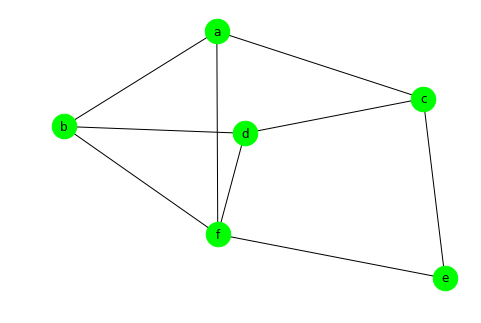

In [47]:
draw_graph(graph)

In [8]:
graph

{'a': {'b', 'c', 'f'},
 'b': {'a', 'd', 'f'},
 'c': {'a', 'd', 'e'},
 'd': {'b', 'c', 'f'},
 'e': {'c', 'f'},
 'f': {'a', 'b', 'd', 'e'}}

In [9]:
type(graph)

dict

In [10]:
graph['a']

{'b', 'c', 'f'}

In [11]:
type(graph['a'])

set

In [12]:
a_set = graph['a']
a_set

{'b', 'c', 'f'}

### Example 1

In [21]:
bfs=Queue()
start = 'a'
goal_state = 'e'
visit = set()
#open new node
bfs.push(start)
while not bfs.isEmpty():    
    current_node = bfs.pop()    
    if current_node == goal_state:
        print('Goal state found at', current_node)
        break
    #get successor
    print(current_node,visit)
    if current_node not in visit:
        new_node = graph[current_node]
        #print(new_node)    
        if len(new_node)>0:
            for newNode in new_node:
            #print(newNode)
                bfs.push(newNode)
        visit.add(current_node)

a set()
f {'a'}
b {'f', 'a'}
c {'f', 'b', 'a'}
d {'f', 'b', 'a', 'c'}
b {'d', 'c', 'a', 'f', 'b'}
a {'d', 'c', 'a', 'f', 'b'}
Goal state found at e


In [104]:
#BFS
bfsq=list()
start = 'a'
goal_state = 'd'
visit = set()
#open new node
bfsq.insert(0,start)

parent = {}
print(type(parent))

while len(bfsq)>0:    
    current_node = bfsq.pop()   
    if current_node == goal_state:
        print('Goal state found at', current_node)
        #print(backtrace(parent, start, goal_state))
        
        path = []
        current = goal_state
        path.append(goal_state)
        while path[-1] != start:
            current = parent[current]
            path.append(current)
        
        print(path)
        break
    #get successor
    #print(current_node)
    if current_node not in visit:
        new_node = graph[current_node]
        #print(new_node)
    
        
        print('current node : ',current_node,
              ' new node : ',new_node,
              ' queue : ',bfsq,
              ' visit : ',visit)
        
        
        if len(new_node)>0:
            for newNode in new_node: 
                if newNode not in visit:
                    bfsq.insert(0,newNode)
                    parent[newNode] = current_node
                    #print(parent,':')
                    #print(current_node)
                    
        visit.add(current_node)

<class 'dict'>
current node :  a  new node :  {'f', 'b', 'c'}  queue :  []  visit :  set()
current node :  f  new node :  {'d', 'b', 'a', 'e'}  queue :  ['c', 'b']  visit :  {'a'}
current node :  b  new node :  {'f', 'd', 'a'}  queue :  ['e', 'b', 'd', 'c']  visit :  {'f', 'a'}
current node :  c  new node :  {'d', 'a', 'e'}  queue :  ['d', 'e', 'b', 'd']  visit :  {'f', 'b', 'a'}
Goal state found at d
['d', 'c', 'a']


In [61]:
parent

{'f': 'a', 'b': 'f', 'c': 'a', 'd': 'c', 'e': 'c'}

In [93]:
goal = goal_state
path = []
current = goal
path.append(goal)

#print(parent[current])


while path[-1] != start:
        current = parent[current]
        #print(current)
        path.append(current)
        


print(path)


['e', 'c', 'a']


In [88]:
parent[current]!= start

True

In [29]:
node = ['a','b','c']
type(node)

list

In [43]:
graph = {
        '1': ['2', '3', '4'],
        '2': ['5', '6'],
        '5': ['9', '10'],
        '4': ['7', '8'],
        '7': ['11', '12']
        }

def backtrace(parent, start, end):
    path = [end]
    while path[-1] != start:
        path.append(parent[path[-1]])
    path.reverse()
    return path


def bfs(graph, start, end):
    parent = {}
    queue = []
    queue.append(start)
    while queue:
        node = queue.pop(0)
        if node == end:
            return backtrace(parent, start, end)
        for adjacent in graph.get(node, []):
            if node not in queue :
                parent[adjacent] = node # <<<<< record its parent 
                queue.append(adjacent)

print(bfs(graph, '1', '11'))

['1', '4', '7', '11']


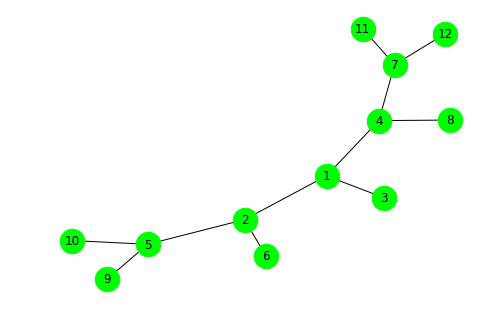

In [44]:
draw_graph(graph)